# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Called JSON to see what the name of the categories are
url = "http://api.openweathermap.org/data/2.5/weather"
city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': 170.8646, 'lat': 10.2753},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 28.26,
  'feels_like': 32.1,
  'temp_min': 28.26,
  'temp_max': 28.26,
  'pressure': 1012,
  'humidity': 76,
  'sea_level': 1012,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 2.4, 'deg': 68, 'gust': 2.53},
 'clouds': {'all': 5},
 'dt': 1722645016,
 'sys': {'country': 'MH', 'sunrise': 1722623162, 'sunset': 1722668362},
 'timezone': 43200,
 'id': 7306523,
 'name': 'Mejit',
 'cod': 200}

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | aginskoye
Processing Record 5 of Set 1 | palangkaraya
Processing Record 6 of Set 1 | gagarin
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | tallahassee
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | hard bargain
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | ust'-kut
Processing Record 16 of Set 1 | bansalan
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | fisterra
Processing Record 22 of Set 1 | port-aux-francais
Processin

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,18.82,77,100,2.57,RE,1722645018
1,puerto ayora,-0.7393,-90.3518,19.90,78,41,5.27,EC,1722645019
2,grytviken,-54.2811,-36.5092,0.04,88,100,5.98,GS,1722645020
3,aginskoye,51.1000,114.5300,15.45,96,100,4.30,RU,1722645021
4,palangkaraya,-2.2000,113.8333,27.27,81,84,0.68,ID,1722645023


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,18.82,77,100,2.57,RE,1722645018
1,puerto ayora,-0.7393,-90.3518,19.90,78,41,5.27,EC,1722645019
2,grytviken,-54.2811,-36.5092,0.04,88,100,5.98,GS,1722645020
3,aginskoye,51.1000,114.5300,15.45,96,100,4.30,RU,1722645021
4,palangkaraya,-2.2000,113.8333,27.27,81,84,0.68,ID,1722645023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

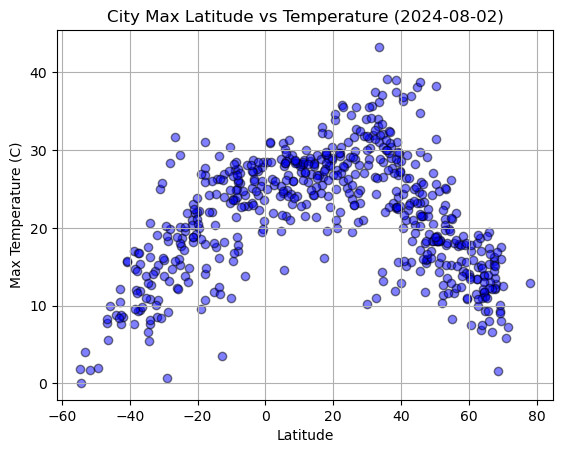

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (2024-08-02)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

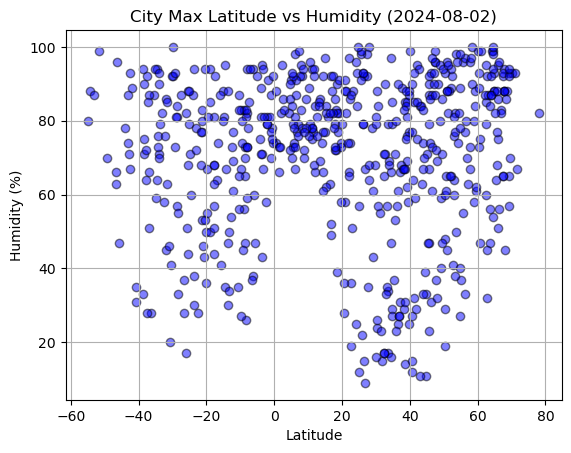

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Humidity (2024-08-02)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

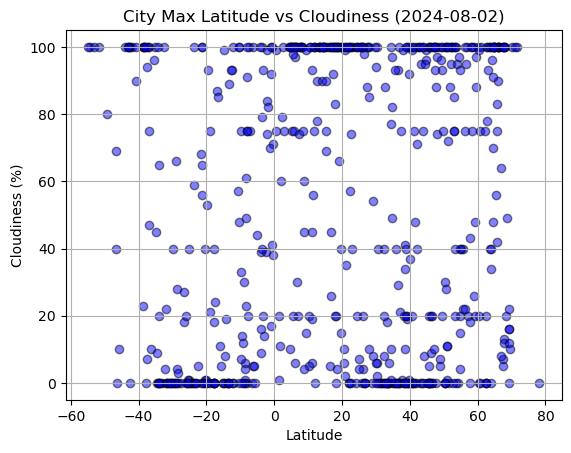

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Cloudiness (2024-08-02)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

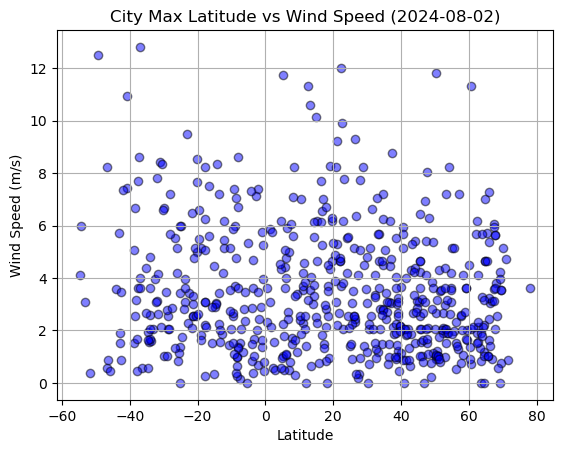

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',color='blue',edgecolor='black',alpha=0.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Wind Speed (2024-08-02)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
#regress_value = x_values*slope+intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,aginskoye,51.1000,114.5300,15.45,96,100,4.30,RU,1722645021
5,gagarin,55.5529,34.9954,11.64,96,22,1.98,RU,1722645024
7,tallahassee,30.4383,-84.2807,28.91,88,100,2.06,US,1722645026
8,dudinka,69.4058,86.1778,15.98,65,22,3.55,RU,1722645027
9,ribeira grande,38.5167,-28.7000,22.65,85,10,4.02,PT,1722645029


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,18.82,77,100,2.57,RE,1722645018
1,puerto ayora,-0.7393,-90.3518,19.90,78,41,5.27,EC,1722645019
2,grytviken,-54.2811,-36.5092,0.04,88,100,5.98,GS,1722645020
4,palangkaraya,-2.2000,113.8333,27.27,81,84,0.68,ID,1722645023
6,alice springs,-23.7000,133.8833,13.75,38,100,3.09,AU,1722645025


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.41147663972354287


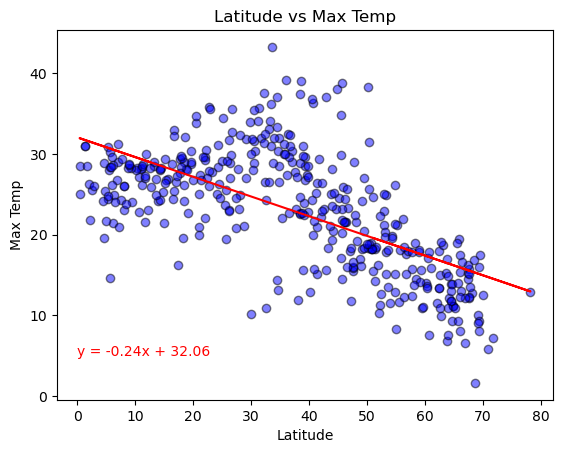

In [39]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,5),color='red')
plt.show()


The r^2-value is: 0.5486883135917443


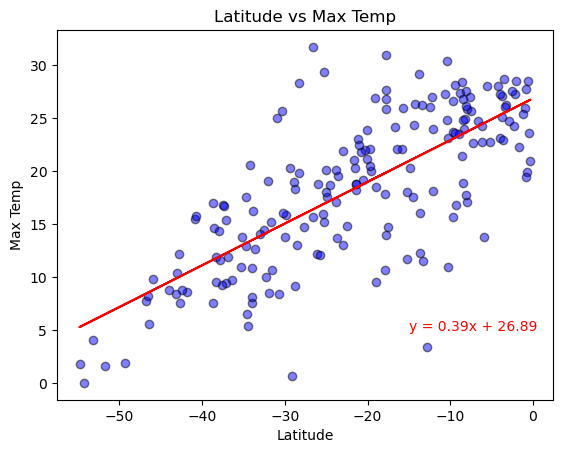

In [41]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-15,5),color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00012735558680124963


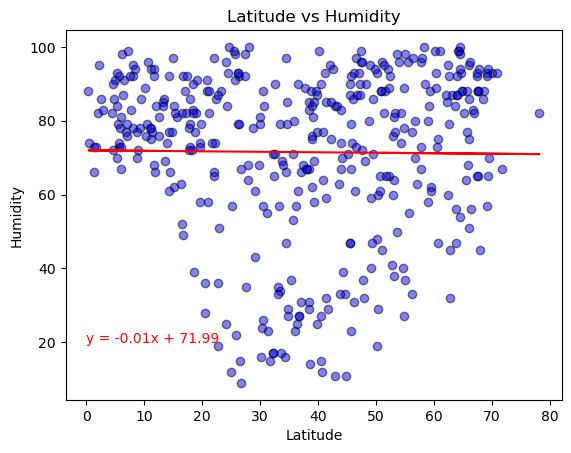

In [45]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,20),color='red')
plt.show()

The r^2-value is: 0.0002365760391811327


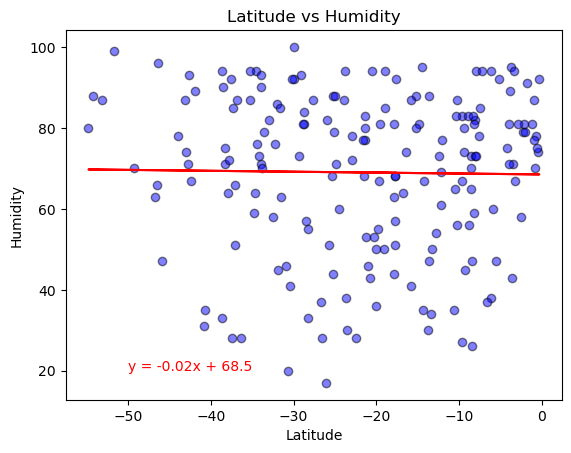

In [76]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,20),color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.008550026893100873


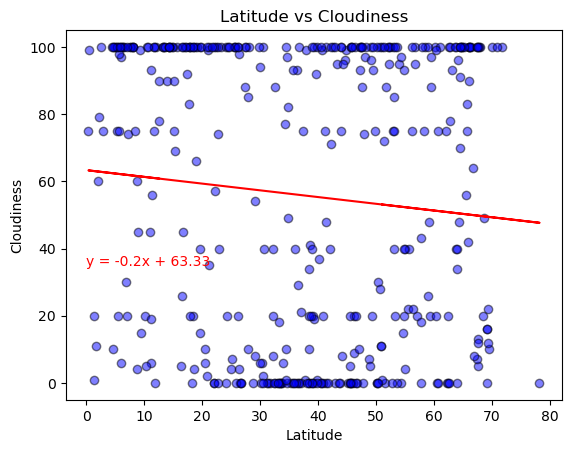

In [74]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,35),color='red')
plt.show()

The r^2-value is: 0.007388881205992753


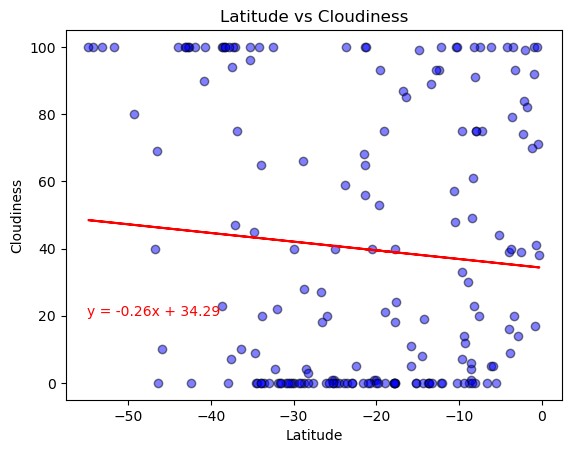

In [70]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,20),color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.019640775913147474


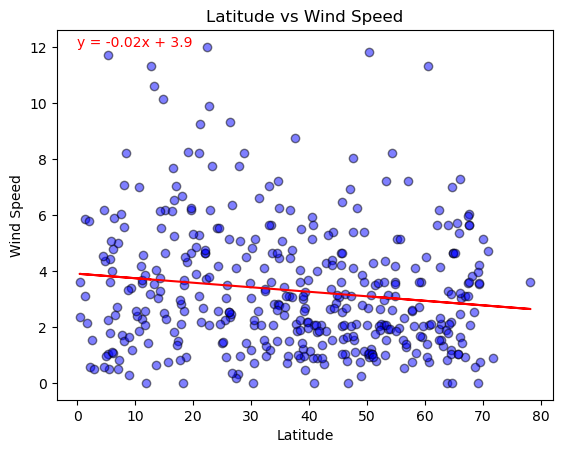

In [57]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
regress_value = (northern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,12),color='red')
plt.show()

The r^2-value is: 0.018601929674731406


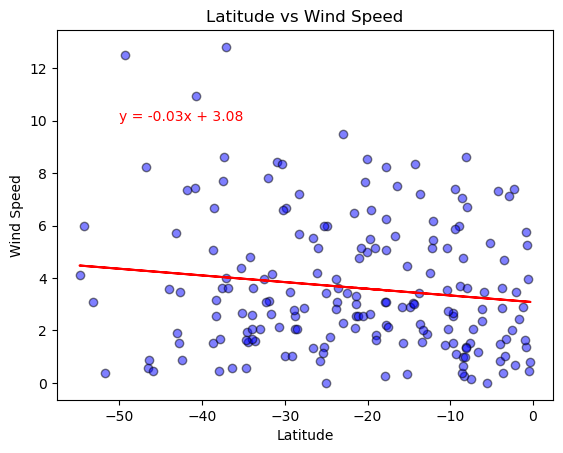

In [64]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
regress_value = (southern_hemi_df['Lat'])*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r^2-value is: {rvalue**2}')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],marker='o',color='blue',edgecolor='black',alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_value,color='red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,10),color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE